In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

%reload_ext autoreload
from utils import load_images, load_features, save_features

images_paths, images = load_images(True)
images_paths.head()

,image_name,label,path,train,label_id,image_id
0,image25107.jpg,apparel,images/apparel/image25107.jpg,True,9,0
1,image26799.jpg,apparel,images/apparel/image26799.jpg,True,9,1
2,image23088.jpg,apparel,images/apparel/image23088.jpg,True,9,2
3,image0421.jpg,apparel,images/apparel/image0421.jpg,True,9,3
4,image15994.jpg,apparel,images/apparel/image15994.jpg,True,9,4


In [3]:
images_paths.shape

(550, 6)

In [2]:
# Función para convertir imágenes a escala de grises y aplicar SIFT
def convert_to_gray_and_apply_sift(images):
    gray_images = []
    descriptors_list = []
    indice_imagen = []

    sift = cv2.SIFT_create()
    for idx, img in enumerate(images):
        # Convertir la imagen a escala de grises
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        # gray_img = cv2.resize()
        gray_images.append(gray_img)

        # Aplicar SIFT en la imagen en escala de grises
        _, descriptors = sift.detectAndCompute(gray_img, None)
        if not(descriptors is None) and len(descriptors) > 3:
            descriptors_list.append(descriptors)
            indice_imagen += [idx] * descriptors.shape[0]
        else:
            pass
            # print(img.shape)
            # plt.imshow(img)
        

    return descriptors_list, indice_imagen

# Convertir las imágenes a escala de grises y aplicar SIFT en el subconjunto de imágenes
descriptors, index = convert_to_gray_and_apply_sift(images)
print("Dimensiones del descriptor de la primera imagen:", descriptors[1].shape)
#descriptors = np.concatenate(descriptors)


Dimensiones del descriptor de la primera imagen: (73, 128)


In [3]:
save_features(descriptors, index, images_paths, "descriptors")

In [3]:
meta, features = load_features('features/descriptors.csv')
meta.head()

,image_id,label_id
0,0,9
1,0,9
2,0,9
3,0,9
4,0,9


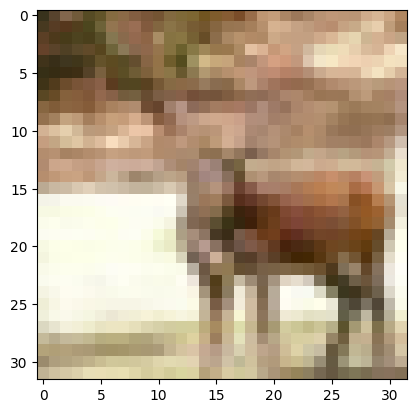

In [ ]:
img_busqueda = x_train[1001]
plt.imshow(img_busqueda)

_,_,descriptor_busqueda,_ = convert_to_gray_and_apply_sift([img_busqueda])



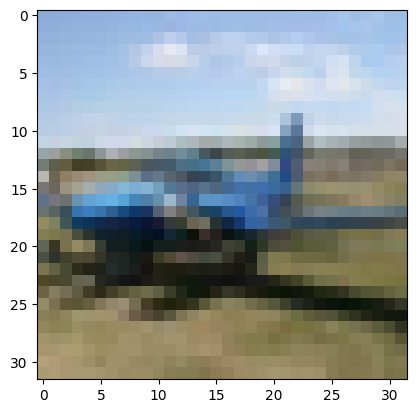

In [ ]:
plt.imshow(x_subset[453])

In [ ]:
descriptor_busqueda[0].shape

(14, 128)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from collections import Counter

# Crear un modelo de k-NN
knn_model = NearestNeighbors(n_neighbors=30)  # Buscar los 5 vecinos más cercanos
knn_model.fit(lista_desciptores_aplanado)  # Ajustar el modelo a los descriptores

# Función para encontrar los vecinos más cercanos para un descriptor dado
def find_nearest_neighbors(descriptor, k = 10):
    descriptor_flat = descriptor.flatten()
    # Encontrar los índices y distancias de los vecinos más cercanos
    distances, indices = knn_model.kneighbors([descriptor_flat], k)  # Obtener k vecinos más cercanos
    return distances, indices

# Ejemplo: Encontrar vecinos más cercanos para el primer descriptor en la primera imagen
contador = Counter()
lista = []
print(len(descriptor_busqueda[0]))
for descriptor in descriptor_busqueda[0]:
    distances, indices = find_nearest_neighbors(descriptor, 20)
    lista.extend([index[indice] for indice in indices[0]])

print(len(lista))
Counter(lista).most_common(10)
# Imprimir los índices de los vecinos más cercanos y sus distancias
#print("Índices de los vecinos más cercanos:", indices)
#print("Distancias a los vecinos más cercanos:", distances)


14
280


[(263, 5),
 (762, 4),
 (381, 4),
 (207, 3),
 (166, 3),
 (81, 3),
 (956, 3),
 (508, 3),
 (779, 3),
 (453, 2)]